# <AI_13_이지현 Project 1>

<hr/>

#1. Goal
## 다음 분기에 어떤 게임을 설계해야 할까?

비디오 게임이란? 컴퓨터가 게임 사용자의 입력을 받아 정해진 규칙에 따라 처리하고 그 과정이나 결과를 출력하는 컴퓨터 프로그램을 이용한 전자게임이다. (위키백과)

우리 회사는 아직 히트작이 없다고 가정한다.

비디오 게임에 대한 데이터를 살펴보고, 나이브 베이즈 분류를 통해 예상 선호도가 가장 높은 장르와 플랫폼의 게임을 선택할 것이다.

<hr/>

# 2. 데이터 수집

주어진 데이터의 정보는 다음과 같다.


> * __Name__ : 게임의 이름입니다.
> 
> * __Platform__ : 게임이 지원되는 플랫폼의 이름입니다.
>
> * __Year__ : 게임이 출시된 연도입니다.
>
> * __Genre__ : 게임의 장르입니다.
>
> * __Publisher__ : 게임을 제작한 회사입니다.
>
> * __NA_Sales__ : 북미지역에서의 출고량입니다.
>
> * __EU_Sales__ : 유럽지역에서의 출고량입니다.
>
> * __JP_Sales__ : 일본지역에서의 출고량입니다.
>
> * __Other_Sales__ : 기타지역에서의 출고량입니다.



데이터는 크게 게임의 정보(Name, Platform, Year, Genre, Publisher)와 출고량 정보(NA_Sales, EU_Sales, JP_Sales, Other_Sales)로 나눌 수 있으며, 각 출고량을 합치면 전 세계 출고량을 알 수 있는 것으로 보인다.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

filename = '/content/drive/My Drive/Colab Notebooks/vgames2.csv'
df = pd.read_csv(filename)

In [ ]:
df.head(3)

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0


<hr/>

# 3. EDA

EDA는 데이터를 분석하기 전에 원본 데이터를 살펴보는 것이다. EDA에는 다음과 같은 과정이 포함된다.

> * 데이터 프레임 속성 확인
>
> * 결측치 확인 및 처리
>
> * 통계치 확인 및 시각화

시각화는 4. Feature Engineering 후에 다루려 한다.

## 3-1 데이터 프레임 속성 확인

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


> (1) 불필요한 열 'Unnamed'가 포함되어 있으므로 삭제해야 한다.
>
> (2) 정수형이어야 할 'Year'이 실수형이므로 타입을 변경해주어야 한다.
>
> (3) 'Year', 'Genre', 'Publisher'에 결측치가 있으므로 처리해주어야 한다.
>
> (4) 숫자형이어야 할 Sales가 문자형이므로 변경해주어야 한다.
>
> (5) 데이터 용량을 줄이기 위해 가능한 문자형을 범주형으로 변경한다.

### 3-1-(1) 'Unnamed' 처리

In [ ]:
df = df.iloc[:, 1:]
df.head(3)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0


### 3-1-(2) 'Year' 타입 변경
아직 결측치를 처리하지 않았기 때문에 결측치 값을 -1로 바꾼 후 타입을 변경했다.

In [ ]:
# 'Year'에 -1을 가진 값이 있는지 확인
df[df['Year'] == -1].shape

(0, 9)

In [ ]:
# 결측치에 임시로 -1 부여
df['Year'].fillna(-1, inplace=True)

In [ ]:
# 'Year'에 정수형으로 변경할 수 없는 값이 있는지 확인
df['Year'].unique()

array([ 2.008e+03,  2.009e+03,  2.010e+03,  2.005e+03,  2.011e+03,
        2.007e+03,  2.001e+03,  2.003e+03,  2.006e+03,  2.014e+03,
        2.015e+03,  2.002e+03,  1.997e+03,  2.013e+03,  1.996e+03,
        2.004e+03,  2.000e+03, -1.000e+00,  1.984e+03,  1.998e+03,
        2.016e+03,  1.985e+03,  1.999e+03,  9.000e+00,  9.700e+01,
        1.995e+03,  1.993e+03,  2.012e+03,  1.987e+03,  1.982e+03,
        1.100e+01,  1.994e+03,  1.990e+03,  1.500e+01,  1.992e+03,
        1.991e+03,  1.983e+03,  1.988e+03,  1.981e+03,  3.000e+00,
        1.989e+03,  9.600e+01,  6.000e+00,  8.000e+00,  1.986e+03,
        1.000e+00,  5.000e+00,  4.000e+00,  1.000e+01,  9.800e+01,
        7.000e+00,  1.600e+01,  8.600e+01,  1.400e+01,  9.500e+01,
        2.017e+03,  1.980e+03,  2.020e+03,  2.000e+00,  1.300e+01,
        0.000e+00,  1.200e+01,  9.400e+01])

다행히 모두 정수형으로 변경 가능한 값이지만, 한자리 혹은 두자리 숫자들이 보인다. 검색 결과 40을 초과하는 것은 1900년대에 만들어진 게임이고 40 이하의 것은 2000년대에 만들어진 게임이었다. 정수 타입으로 변경 후 이러한 이상값을 처리하기로 했다. 

In [ ]:
# 정수형으로 타입 변경
df['Year'] = df['Year'].astype(int)

In [ ]:
# 이상값 처리
df.loc[(df['Year'].values >= 48) & (df['Year'].values < 100), 'Year'] += 1900
df.loc[(df['Year'].values >= 0) & (df['Year'].values < 48), 'Year'] += 2000

df['Year'].unique()

array([2008, 2009, 2010, 2005, 2011, 2007, 2001, 2003, 2006, 2014, 2015,
       2002, 1997, 2013, 1996, 2004, 2000,   -1, 1984, 1998, 2016, 1985,
       1999, 1995, 1993, 2012, 1987, 1982, 1994, 1990, 1992, 1991, 1983,
       1988, 1981, 1989, 1986, 2017, 1980, 2020])

최초의 비디오 게임이 만들어진 것이 1948년임을 생각하여 기준 수치를 48로 적용했다.

결측치를 임시로 처리한 -1 외에는 우리가 익숙한 4자리수 연도인 것이 확인되었다.

### 3-1-(3) 결측치 처리

In [ ]:
# 결측치 확인
df.isna().sum()

Name            0
Platform        0
Year            0
Genre          50
Publisher      58
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
dtype: int64

In [ ]:
# 'Year' 결측치 확인
df[df['Year']==-1].shape # 271개

(271, 9)


#### Year
다른 열에 비해 결측치가 많으므로 스크래핑을 통해 가능한 정보를 새로 수집했다. 다만 구글 코랩에서 스크래핑 프로그램이 잘 돌아가지 않아 주피터 노트북을 활용해 정보를 수집한 후 가져왔다. 다음은 주피터 노트북에서 사용한 스크래핑 코드이다.


```python
# 설치 및 라이브러리 불러오기
%pip install selenium
%pip install webdriver-manager
%pip install beautifulsoup4

from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
import time
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup

# 크롬 실행
driver = webdriver.Chrome(ChromeDriverManager().install())
urls = 'https://www.google.com/'
driver.get(urls)

# 데이터에서 검색을 실행할 키워드
index = list(df.index[df['Year'] == -1])
name = list(df[df['Year'] == -1]['Name'])

index_name = []
for i, n in zip(index, name):
    index_name.append([i, n])

# 스크래핑 함수 작성
def key_search(key):
    driver.get(urls)
    txt_input = driver.find_element_by_css_selector('body > div.L3eUgb > div.o3j99.ikrT4e.om7nvf > form > div:nth-child(1) > div.A8SBwf > div.RNNXgb > div > div.a4bIc > input')
    word = txt_input.send_keys(key + ' release date')
    txt_input.send_keys(Keys.ENTER)
    year = driver.find_element_by_css_selector('#rso > div.ULSxyf > block-component > div > div.dG2XIf.EyBRub.XzTjhb > div.L29P6c.fm06If > div > div > div.ifM9O > div > div > div.kp-header > div > div.DI6Ufb > div.EfDVh.wDYxhc.NFQFxe.viOShc.LKPcQc > div > div.Z0LcW')
    res = year.text   # xxxx년 xx월 xx일
    return res[:4]

# 스크래핑 실행
# 검색 결과가 없을 경우 -1
index_year = []
for i, n in index_name:
    try:
        y = key_search(n)
        index_year.append([i, y])
    except:
        index_year.append([i, -1])

```

In [ ]:
# 스크래핑 결과
index_year = [[31, '2007'],
 [109, -1],
 [273, '2012'],
 [358, '2009'],
 [430, '1997'],
 [31, '2007'],
 [109, -1],
 [273, '2012'],
 [358, '2009'],
 [430, '1997'],
 [548, '2001'],
 [675, '2011'],
 [808, '2006'],
 [818, '2001'],
 [952, '2006'],
 [1011, '2002'],
 [1041, '2002'],
 [1093, '2006'],
 [1235, -1],
 [1285, '2006'],
 [1301, -1],
 [1509, '2010'],
 [1523, '1996'],
 [1534, -1],
 [1572, '2013'],
 [1613, '2008'],
 [1796, -1],
 [1879, '2007'],
 [1884, '2001'],
 [1903, '2003'],
 [2026, '2002'],
 [2056, '2007'],
 [2062, -1],
 [2070, '2010'],
 [2130, '2006'],
 [2142, '2005'],
 [2202, '2003'],
 [2270, '2004'],
 [2337, '2011'],
 [2408, -1],
 [2478, '2006'],
 [2492, '2001'],
 [2527, '1980'],
 [2545, '1984'],
 [2552, '2007'],
 [2824, '2001'],
 [2934, -1],
 [2970, '2006'],
 [3031, '1997'],
 [3069, '2001'],
 [3135, -1],
 [3182, '2010'],
 [3184, -1],
 [3187, '2007'],
 [3238, '2006'],
 [3291, -1],
 [3347, '2008'],
 [3407, '2008'],
 [3533, '1998'],
 [3562, '2005'],
 [3605, '2011'],
 [3639, '2015'],
 [3811, -1],
 [3832, -1],
 [3841, '2002'],
 [3895, '2010'],
 [3942, '1999'],
 [4124, '2010'],
 [4165, -1],
 [4181, '2007'],
 [4196, '2011'],
 [4230, '2006'],
 [4238, '2008'],
 [4255, '2008'],
 [4308, -1],
 [4488, '2011'],
 [4497, '2011'],
 [4501, '2000'],
 [4511, -1],
 [4521, '1990'],
 [4608, '2010'],
 [4617, '2017'],
 [4714, '2009'],
 [4865, '2012'],
 [4911, '2011'],
 [5055, '2005'],
 [5140, '2010'],
 [5144, '2010'],
 [5160, '2010'],
 [5175, -1],
 [5230, '1977'],
 [5309, '2011'],
 [5674, '2002'],
 [5720, '1980'],
 [5728, '2003'],
 [5757, '2008'],
 [5957, '2011'],
 [5994, '2005'],
 [6118, '1975'],
 [6152, '2008'],
 [6178, '2009'],
 [6209, '2006'],
 [6223, '2008'],
 [6257, '2005'],
 [6288, '2020'],
 [6318, '2009'],
 [6354, '2019'],
 [6375, '2009'],
 [6385, '2013'],
 [6392, -1],
 [6512, '2011'],
 [6575, '1980'],
 [6623, '2005'],
 [6779, '2007'],
 [6949, '2003'],
 [7008, '2005'],
 [7131, '2010'],
 [7150, '2003'],
 [7619, '2011'],
 [7682, '2002'],
 [7686, '2005'],
 [7713, '2009'],
 [7774, '1997'],
 [7792, '2007'],
 [7847, '2005'],
 [8055, '2002'],
 [8076, '2011'],
 [8244, '2006'],
 [8333, '1988'],
 [8350, '2002'],
 [8422, '1999'],
 [8470, '2011'],
 [8525, '2011'],
 [8529, '2008'],
 [8546, -1],
 [8600, '2009'],
 [8638, '2012'],
 [8651, -1],
 [8812, '2005'],
 [8849, -1],
 [9016, '2008'],
 [9082, '2010'],
 [9184, '2002'],
 [9240, '2011'],
 [9298, '2011'],
 [9577, '2011'],
 [9640, -1],
 [9684, -1],
 [9698, '2004'],
 [9762, '2011'],
 [9877, '1995'],
 [9920, '1978'],
 [9958, '2008'],
 [10032, '2002'],
 [10084, '2008'],
 [10092, '1989'],
 [10094, '2009'],
 [10119, '2011'],
 [10144, '2002'],
 [10156, -1],
 [10269, '2010'],
 [10301, '2006'],
 [10321, '2011'],
 [10324, '2011'],
 [10327, '2006'],
 [10346, '2011'],
 [10431, '2000'],
 [10534, '2009'],
 [10563, '2011'],
 [10637, '2008'],
 [10719, '2011'],
 [10775, '2013'],
 [10776, '2007'],
 [10841, '2012'],
 [10896, '2004'],
 [10915, '2002'],
 [10965, '2003'],
 [11125, '1980'],
 [11145, '2012'],
 [11188, '2010'],
 [11193, '2006'],
 [11309, '1998'],
 [11316, '1977'],
 [11332, -1],
 [11386, '2002'],
 [11405, '1987'],
 [11476, '2006'],
 [11508, '2002'],
 [11584, '2006'],
 [11605, '2002'],
 [11641, '2011'],
 [11658, '1987'],
 [11665, '2011'],
 [11711, -1],
 [11754, '2011'],
 [11764, '2009'],
 [11837, -1],
 [12088, '2002'],
 [12111, '2010'],
 [12307, '2012'],
 [12324, '2007'],
 [12355, '2009'],
 [12390, '2004'],
 [12417, '2008'],
 [12536, '2004'],
 [12616, '1978'],
 [12703, '2008'],
 [12710, '2011'],
 [12787, '2002'],
 [12799, '2003'],
 [12816, '2003'],
 [12858, '2007'],
 [12986, '2010'],
 [13162, '2011'],
 [13187, -1],
 [13190, '2011'],
 [13256, '2011'],
 [13327, '2001'],
 [13357, '2011'],
 [13406, '2010'],
 [13450, -1],
 [13488, '2019'],
 [13583, '2005'],
 [13589, '2008'],
 [13628, '2004'],
 [13656, '2010'],
 [13678, '2004'],
 [13734, '2010'],
 [13752, '2002'],
 [13766, '1987'],
 [13844, '2007'],
 [13889, '2002'],
 [13902, -1],
 [13923, -1],
 [13954, -1],
 [14003, -1],
 [14012, -1],
 [14049, '2006'],
 [14050, -1],
 [14119, '2004'],
 [14292, '2006'],
 [14303, '2011'],
 [14436, '2008'],
 [14580, '2008'],
 [14585, '2002'],
 [14622, '2008'],
 [14765, '1995'],
 [14911, -1],
 [14941, -1],
 [14968, '2008'],
 [15001, '2003'],
 [15013, '2008'],
 [15051, '2008'],
 [15063, '2018'],
 [15093, '2003'],
 [15147, '2006'],
 [15216, '2002'],
 [15317, '2011'],
 [15332, '2011'],
 [15402, '2002'],
 [15406, '2002'],
 [15411, -1],
 [15499, '2000'],
 [15655, '2009'],
 [15669, '2004'],
 [15776, '2017'],
 [15805, '1980'],
 [15897, '2004'],
 [16053, '2010'],
 [16130, -1],
 [16195, '2010'],
 [16240, '2003'],
 [16275, '1978'],
 [16278, '2010'],
 [16425, '2011'],
 [16432, '2010']]

In [ ]:
# 스크래핑 결과 데이터에 넣기
for i, y in index_year:
    df['Year'].iloc[i] = int(y)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
# 남은 결측치 수 확인
df[df['Year']==-1].shape   # 39개: 제거해도 괜찮을 정도로 작다.

(39, 9)

In [ ]:
# 'Year' 결측치 제거
ind = df[df['Year']==-1].index
df.drop(ind, inplace=True)

#### Genre & Publisher
기존 결측치 개수가 충분히 작으므로 제거한다.

In [ ]:
# 결측치 제거
df.dropna(inplace=True)

In [ ]:
# 결측치 확인
df.isna().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

### 3-3-(4) 'Sales' 타입 변경
'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'를 살펴본 결과 'K', 'M'과 같은 문자형 데이터가 있었으며, 전체적으로 소수 형태를 띄고 있다. 따라서 'K'와 'M'을 적절하게 제거한 후 int형 보다는 float형으로 바꾸어줄 필요가 있다.

데이터를 살펴 본 결과, M이 붙은 데이터는 다른 데이터와 단위가 비슷한데 비해 K가 붙은 데이터는 *1000이 된 단위로 보였다. 사회적 통념상 M=1,000,000, K=1,000을 의미하므로, Sales 데이터의 기본 단위는 백만이라는 것을 알 수 있었다. 타입을 변경하는 과정에서 이를 고려했다.

In [ ]:
def SalesToFloat(v):
  if v[-1] == 'K':
    v = v.replace('K', '')
    return float(v) / 1000
  elif v[-1] == 'M':
    v = v.replace('M', '')
    return float(v)
  else:
    return float(v)

df['NA_Sales'] = df['NA_Sales'].apply(SalesToFloat)
df['EU_Sales'] = df['EU_Sales'].apply(SalesToFloat)
df['JP_Sales'] = df['JP_Sales'].apply(SalesToFloat)
df['Other_Sales'] = df['Other_Sales'].apply(SalesToFloat)

In [ ]:
# 데이터프레임의 정보 다시 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16460 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16460 non-null  object 
 1   Platform     16460 non-null  object 
 2   Year         16460 non-null  int64  
 3   Genre        16460 non-null  object 
 4   Publisher    16460 non-null  object 
 5   NA_Sales     16460 non-null  float64
 6   EU_Sales     16460 non-null  float64
 7   JP_Sales     16460 non-null  float64
 8   Other_Sales  16460 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.3+ MB


In [ ]:
# 편의를 위해 index 초기화
df.reset_index(drop=True, inplace=True)

### 3-3-(5) 'Platform'과 'Genre' 범주형으로 변경

In [ ]:
print(df['Platform'].unique())
print(df['Genre'].unique())

['DS' 'Wii' 'PSP' 'PS3' 'PC' 'PS' 'GBA' 'PS4' 'PS2' 'XB' 'X360' 'GC' '3DS'
 '2600' 'SAT' 'GB' 'NES' 'DC' 'N64' 'XOne' 'SNES' 'WiiU' 'PSV' 'GEN' 'SCD'
 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
['Action' 'Adventure' 'Misc' 'Platform' 'Sports' 'Simulation' 'Racing'
 'Role-Playing' 'Puzzle' 'Strategy' 'Fighting' 'Shooter']


데이터에 비해 고유값의 수가 적으므로 범주형으로 변경하기 적합해 보인다.

In [ ]:
# 범주형으로 타입 변경
df['Platform'] = df['Platform'].astype('category')
df['Genre'] = df['Genre'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16460 entries, 0 to 16459
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Name         16460 non-null  object  
 1   Platform     16460 non-null  category
 2   Year         16460 non-null  int64   
 3   Genre        16460 non-null  category
 4   Publisher    16460 non-null  object  
 5   NA_Sales     16460 non-null  float64 
 6   EU_Sales     16460 non-null  float64 
 7   JP_Sales     16460 non-null  float64 
 8   Other_Sales  16460 non-null  float64 
dtypes: category(2), float64(4), int64(1), object(2)
memory usage: 934.1+ KB


데이터의 용량이 1.3MB에서 0.9MB로 감소했다.

<hr/>

# 4. Feature Engineering

기존 Feature를 이용하여 새로운 Feature를 생성한다.

데이터 분석에 더욱 적절한 Feature로 바꾸어야 한다.

## 4-1 'Global_Sales'

NA_Sales, EU_Sales, JP_Sales, Other_Sales 열의 값을 합치면 전세계 출고량을 알 수 있다. 이는 게임이 전세계적으로 얼마나 수익을 올렸는지 알 수 있는 지표이므로 데이터 분석에 유용할 것이라고 생각한다.

In [ ]:
df['Global_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

## 4-2 'Year_bin'
'Year'의 데이터를 구간화하는 것으로 시각화에 더욱 도움이 될 것이라고 생각한다.

In [ ]:
# 'Year'의 데이터 확인
year = df['Year'].unique()
year.sort()
year

array([1975, 1977, 1978, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [ ]:
df['Year_bin'] = pd.cut(df['Year'], bins=[1970, 1989, 1999, 2009, 2020], labels=["70~80'", "90'", "00'", "10'"])

## 4-3 'Series'
기존 게임의 새로운 시리즈가 나오면 기존 게임의 팬이 유입될 것으로 보인다.

게임의 이름에서 시리즈를 상징하는 문자를 찾고 그에 따라 임의로 label을 부여했다.

In [ ]:
# 데이터프레임을 조작하기 때문에 복사본 사용
df0 = df.copy()
df0 = df0.reset_index()

# 시리즈를 상징하는 문자를 담고 있는지에 대한 조건
ser1 = (df0['Name'].str.contains('\d$'))
ser2 = (df0['Name'].str.contains(': '))
ser3 = (df0['Name'].str.contains(' I+$'))
ser4 = (df0['Name'].str.contains(' V$'))
ser5 = (df0['Name'].str.contains(' I+V$'))
ser6 = (df0['Name'].str.contains(' VI+$'))
ser7 = (df0['Name'].str.contains(' X$'))

# 시리즈를 상징하는 문자 중 하나에라도 해당하면 새로운 데이터 프레임에 추가
df0_ser = df0[ser1].merge(df0[ser2], how='outer').merge(df0[ser3], how='outer').merge(df0[ser4], how='outer').merge(df0[ser5], how='outer').merge(df0[ser6], how='outer').merge(df0[ser7], how='outer')

In [ ]:
# df0_ser의 'index'에 df0의 'index'가 포함된다면 1 (시리즈O) 아니면 0 (시리즈X)
df0['Series'] = df0['index'].apply(lambda x: 1 if x in list(df0_ser['index']) else 0)

In [ ]:
# 원본 데이터 df에 'Series'를 추가하고 확인

df['Series'] = df0['Series']
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Year_bin,Series
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04,00',0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18,00',0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02,10',0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04,10',1
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25,10',1


## 4-4 'Label'
K-Means Clustering을 통해 데이터를 라벨화하고 해당 열을 추가한다.

In [ ]:
# 여기서부터는 시각화가 필요하기 때문에 필요한 라이브러리 미리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# 색상
cmap = plt.get_cmap('Pastel1')
colors = [cmap(i) for i in np.linspace(0,1,9)]

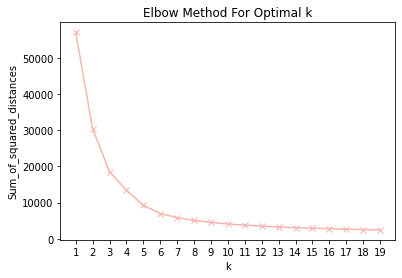

In [ ]:
from sklearn.cluster import KMeans 

features = df.loc[:, 'NA_Sales' : 'Global_Sales']

# k의 수를 결정하기 위한 Elbow Method
sum_of_squared_distances = []

K = range(1, 20)

for k in K:
  km = KMeans(n_clusters=k, random_state=42)
  km = km.fit(features)
  sum_of_squared_distances.append(km.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-', color='#fab4ae')

plt.xticks(K)
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

> Elbow Method는 그래프가 완만해지는 지점을 k로 정하는 방법이다. k=5로 결정했다.

In [ ]:
# K-Means Clustering
kmeans = KMeans(n_clusters = 5)
kmeans.fit(features)
labels = kmeans.labels_

# 'Label' 추가
df['Label'] = pd.DataFrame(kmeans.labels_, columns=['label'])
df['Label'] = df['Label'].astype('category')

# 확인
df.head(3)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Year_bin,Series,Label
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.0,0.00,0.00,0.04,00',0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.0,0.00,0.01,0.18,00',0,0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.0,0.02,0.00,0.02,10',0,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


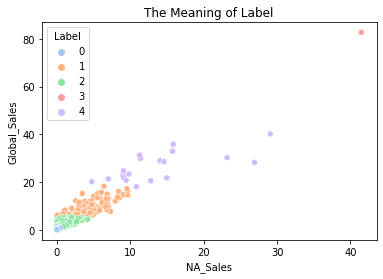

In [ ]:
# 'Label'의 의미를 알아보기 위해 scatterplot을 그려보았다.

sns.set_palette('pastel')
sns.scatterplot('NA_Sales', 'Global_Sales', hue='Label', data=df)
plt.title('The Meaning of Label')
plt.show()

> 'Label'이 'Global_Sales'와 같은 방향으로 움직인다는 것을 알 수 있다.
> 
> 또한 Global_Sales가 NA_Sales와 같은 방향으로 증가하는 추세라는 것도 확인할 수 있다.
> 
> 이를 바탕으로 'Label'을 등급화시켰다.

In [ ]:
Label_dict = {}

Label_dict[df[df['Label']==0]['Global_Sales'].mean()] = 0
Label_dict[df[df['Label']==1]['Global_Sales'].mean()] = 1
Label_dict[df[df['Label']==2]['Global_Sales'].mean()] = 2
Label_dict[df[df['Label']==3]['Global_Sales'].mean()] = 3
Label_dict[df[df['Label']==4]['Global_Sales'].mean()] = 4

sr = list(Label_dict.keys())
sr.sort()
sr.reverse()
sr

for i, k in enumerate(sr):
  if i == 0:
    df['Label'] = df['Label'].replace(Label_dict[k],'A')
  elif i == 1:
    df['Label'] = df['Label'].replace(Label_dict[k],'B')
  elif i == 2:
    df['Label'] = df['Label'].replace(Label_dict[k],'C')
  elif i == 3:
    df['Label'] = df['Label'].replace(Label_dict[k],'D')
  else:
    df['Label'] = df['Label'].replace(Label_dict[k],'E')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


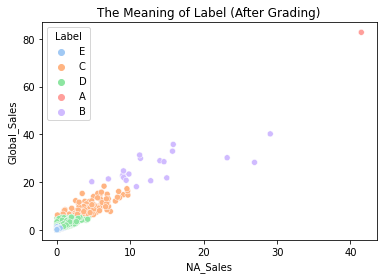

In [ ]:
# 'Label'의 등급화 확인
sns.scatterplot('NA_Sales', 'Global_Sales', hue='Label', data=df)
plt.title('The Meaning of Label (After Grading)')
plt.show()

## 4-5 Drop

데이터 분석에 필요 없는 데이터를 제거한다.

'Name'을 제거할 계획이었지만, '가장 많이 팔린 게임'이 무엇인지 분석할 필요가 있기 때문에 제거하지 않기로 결정했다.

'Year'을 대체할 'Year_bin'을 생성하였으므로 제거하기로 결정했다.

In [ ]:
df.drop('Year', axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16460 entries, 0 to 16459
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Name          16460 non-null  object  
 1   Platform      16460 non-null  category
 2   Genre         16460 non-null  category
 3   Publisher     16460 non-null  object  
 4   NA_Sales      16460 non-null  float64 
 5   EU_Sales      16460 non-null  float64 
 6   JP_Sales      16460 non-null  float64 
 7   Other_Sales   16460 non-null  float64 
 8   Global_Sales  16460 non-null  float64 
 9   Year_bin      16460 non-null  category
 10  Series        16460 non-null  int64   
 11  Label         16460 non-null  category
dtypes: category(4), float64(5), int64(1), object(2)
memory usage: 1.1+ MB


<hr/>

# 5. 시각화
데이터를 시각화하면 한눈에 데이터에 대한 정보를 확인할 수 있으며, 가설에 대한 아이디어를 얻을 수 있다.

## 5-1 전세계적 비디오 게임 시장 추이

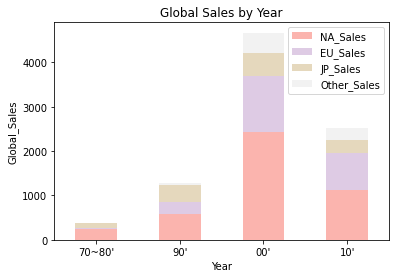

In [ ]:
df_stack = df.groupby('Year_bin')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
df_stack.plot.bar(stacked=True, cmap=plt.cm.Pastel1)

plt.xlabel('Year')
plt.ylabel('Global_Sales')
plt.title('Global Sales by Year')
plt.xticks(rotation=0)
plt.show()

> 2000년대까지 증가하던 비디오 게임 시장이 2010년대에 주춤한 추세를 보인다. 한국콘텐츠진흥원에 따르면 최근 비디오 게임을 선두하는 것은 모바일 플랫폼이다. 이러한 모바일 플랫폼에 대한 데이터가 없기 때문에 이러한 결과가 나온 것이라고 추측할 수 있다.
>
> 유럽 지역의 출고량 비율이 특히 늘어나는 추세이며, 일본 지역과 기타지역의 비중 또한 과거에 비해 증가한 모습이다. 따라서 국가별로 특별히 선호하는 장르가 있는지 살펴볼 필요가 있다.

## 5-2 가장 많이 팔린 게임은 무엇일까?

In [ ]:
Top10 = df.sort_values(by='Global_Sales', ascending=False)[:10]
Top10.loc[:, :'Publisher'].style.hide_index()

Name,Platform,Genre,Publisher
Wii Sports,Wii,Sports,Nintendo
Super Mario Bros.,NES,Platform,Nintendo
Mario Kart Wii,Wii,Racing,Nintendo
Wii Sports Resort,Wii,Sports,Nintendo
Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo
Tetris,GB,Puzzle,Nintendo
New Super Mario Bros.,DS,Platform,Nintendo
Wii Play,Wii,Misc,Nintendo
New Super Mario Bros. Wii,Wii,Platform,Nintendo
Duck Hunt,NES,Shooter,Nintendo


> 차트에서 가장 눈에 띄는 것은 'Publisher'이다. 1위부터 10위까지 Nintendo가 차지하고 있다.

## 5-3 게임 제작 회사의 파이 분배

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


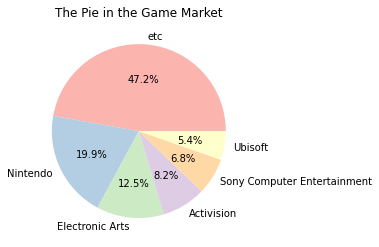

In [ ]:
df_P = df[['Publisher', 'Global_Sales']]
df_P['Publisher'] = df_P['Publisher'].apply(lambda x: x if x in ['Nintendo', 'Electronic Arts', 'Activision', 'Sony Computer Entertainment', 'Ubisoft'] else 'etc')
df_P = df_P.groupby(['Publisher'])['Global_Sales'].sum().sort_values(ascending=False)

plt.pie(x=df_P, labels=df_P.index, autopct='%.1f%%', colors=colors)
plt.title('The Pie in the Game Market')
plt.show()

In [ ]:
df['Publisher'].nunique()

576

> 총 576개의 회사 중 'Nintendo', 'Electronic Arts', 'Activision', 'Sony Computer Entertainment', 'Ubisoft' 이렇게 5개의 회사가 파이의 절반 이상을 차지한 모습이다.
특히 'Nintendo'는 '마리오'시리즈와 '포켓몬'시리즈로 사랑받으며 20% 가까운 점유율을 보이고 있다.

## 5-4 시리즈 게임은 더 잘 팔렸을까?



In [ ]:
# 닌텐도 회사 제외
df_nin = df[~(df['Publisher'] == 'Nintendo')]

> 위에서 언급했듯이 'Nintendo'는 '마리오'와 '포켓몬'과 같은 유명한 시리즈로 가장 많이 팔린 게임 10개에 모두 이름을 올렸다. 그러나 위에서 시리즈에 대한 임의의 라벨링 과정에서 '마리오'와 '포켓몬' 시리즈 등 기본 패턴과 다른 이름을 고려하지 못했다. 따라서 비중이 큰 'Nintendo'를 제외하고 살펴볼 필요가 있다.

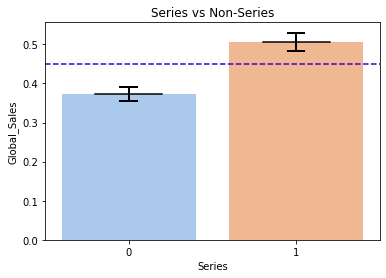

In [ ]:
# 시리즈물

df_nin['Global_Sales'].mean()
pop_mean = df_nin['Global_Sales'].mean()

plt.axhline(pop_mean, linestyle='--', color='#4000c7')

plt.axhline(df_nin[df_nin['Series'] == 0]['Global_Sales'].mean(), color = 'black', xmin = 0.15, xmax = 0.35)
plt.axhline(df_nin[df_nin['Series'] == 1]['Global_Sales'].mean(), color = 'black', xmin = 0.65, xmax = 0.85)

sns.set_palette('pastel')
sns.barplot(x='Series', y='Global_Sales', data=df_nin, capsize=0.1, errcolor='black', errwidth=2, )

plt.title('Series vs Non-Series')
plt.show()

> 그래프로 보기에 두 집단은 큰 차이가 있어보인다. 뒤에서는 t-test를 통해 두 집단간에 유의미한 차이가 있는지 알아볼 예정이다.

## 5-5 지역에 따라서 선호하는 게임 장르가 다를까?

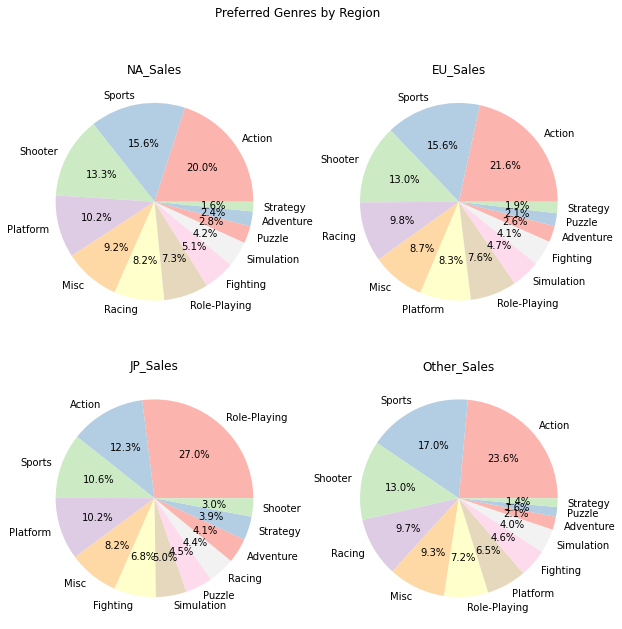

In [ ]:

f, ax = plt.subplots(2, 2)
f.set_size_inches((10, 10))

i, j = [0, 0]
for col in ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']:
  df_G = df.groupby('Genre')[col].sum().sort_values(ascending=False)

  ax[i][j].pie(x=df_G, labels=df_G.index, autopct='%.1f%%', colors=colors)
  ax[i][j].set_title(col)

  j+=1
  if j > 1:
    i = 1
    j = 0


f.suptitle('Preferred Genres by Region')
plt.show()

> 북미 지역, 유럽 지역, 기타 지역에서는 'Action', 'Sports', 'Shooter' 장르가 유사한 비율로 1~3위를 차지했다. 그러나 일본 지역에서는 'Role-Playing' 장르가 25% 이상의 비율로 압도적으로 1위를 차지했으며, 'Shooter' 장르가 꼴찌를 차지했다. 따라서 지역에 따라서 선호하는 게임의 장르가 일부 다르다고 할 수 있다.

## 5-6 연도별 게임의 트렌드가 있을까?

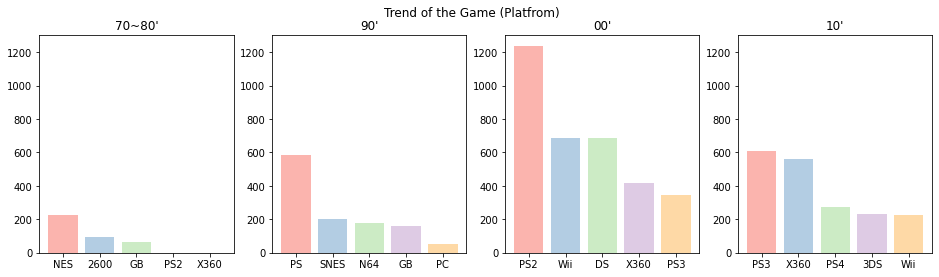

In [ ]:
# 플랫폼 트렌드
df_Pl = df.groupby(['Year_bin', 'Platform'])['Global_Sales'].sum()
df_Pl = df_Pl.reset_index()

f, ax = plt.subplots(1, 4)
f.set_size_inches((16, 4))

i=0
for bin in ["70~80'", "90'", "00'", "10'"]:
  df_Pl_bin = df_Pl[df_Pl['Year_bin']==bin].sort_values(by='Global_Sales', ascending=False)[:5]

  ax[i].bar(df_Pl_bin['Platform'], df_Pl_bin['Global_Sales'], color=colors)
  ax[i].set_title(bin)
  ax[i].set_ylim(0, 1300)
  i+=1

plt.ylim(0, 1300)
f.suptitle('Trend of the Game (Platfrom)')
plt.show()

> 세기가 넘어감에 따라 플랫폼의 트렌드가 변화한 것을 확인할 수 있다.
> 
> 20세기에는 닌텐도에서 개발한 일명 패밀리 컴퓨터인 'NES'와 'SNES'가 전세계적 출고량이 많은 플랫폼이었다. 그러나 소니의 플레이스테이션이 나온 이후 새로운 세대가 나올 때마다 우세를 차지하고 있다. 2010년대에는 마이크로소프트에서 출시한 'X360'(엑스박스 360)이 그 뒤를 바짝 추격하고 있다.
>
> 뒤에서는 트렌드와 연도가 서로 연관성이 있는지 가설검증을 통해 확인할 예정이다.

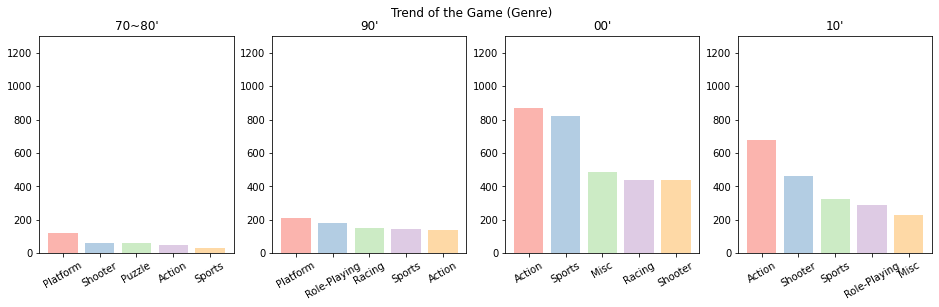

In [ ]:
# 장르 트렌드
df_Gt = df.groupby(['Year_bin', 'Genre'])['Global_Sales'].sum()
df_Gt = df_Gt.reset_index()

f, ax = plt.subplots(1, 4)
f.set_size_inches((16, 4))

i=0
for bin in ["70~80'", "90'", "00'", "10'"]:
  df_Gt_bin = df_Gt[df_Gt['Year_bin']==bin].sort_values(by='Global_Sales', ascending=False)[:5]

  ax[i].bar(df_Gt_bin['Genre'], df_Gt_bin['Global_Sales'], color=colors)
  ax[i].set_title(bin)
  ax[i].set_ylim(0, 1300)
  ax[i].tick_params(axis='x', rotation=30)
  i+=1

plt.ylim(0, 1300)

f.suptitle('Trend of the Game (Genre)')
plt.show()

> 장르도 마찬가지로 세가기 바뀜에 따라 트렌드가 변화한 것을 확인할 수 있다. 21세기가 되면서 컴퓨터가 발달함에 따라 높은 그래픽을 요구하는 'Action' 장르가 굳건한 1위를 차지하고 있으며, 'Platform' 장르의 인기 순위가 하락한 것을 확인할 수 있다.
>
> 뒤에서는 연도와 장르가 서로 연관성이 있는지 가설검증을 통해 확인할 예정이다.

<hr/>

# 6. 가설 검증
가설을 검증하는데 t-test, X^2-test를 사용할 것이다.

> * t-test는 두 수치형 데이터의 평균을 비교하여, 그 두 데이터가 같은 데이터군인지 판별해준다.
>
> * X^2-test는 두 범주형 데이터의 연관성 여부를 알려준다.

95%의 신뢰도에서 검정 결과를 해석하여, P-value < 0.05라면 귀무가설을 기각하고 대립가설을 채택할 것이다.

## 6-1 Series와 Non-Series의 데이터는 같을까?
> * 귀무가설: 'Series'와 'Non-Series'의 평균이 같다.
>
> * 대립가설: 'Series'와 'Non-Series'의 평균이 같다.

In [ ]:
# t-test

from scipy import stats
stats.ttest_ind(df_nin[df_nin['Series'] == 0]['Global_Sales'], df_nin[df_nin['Series'] == 1]['Global_Sales'])

Ttest_indResult(statistic=-8.564270243326776, pvalue=1.1869460992019652e-17)

> P-value < 0.05이므로 귀무가설을 기각한다.
>
> 따라서 두 데이터는 같은 데이터군에 있다고 할 수 없다.

## 6-2 연도와 플랫폼은 연관성이 있을까?
> * 귀무가설: 'Year_bin'과 'Platform'은 연관성이 없다.
>
> * 대립가설: 'Year_bin'과 'Platform'은 연관성이 있다.

In [ ]:
from scipy.stats import chi2_contingency

cross1 = pd.crosstab(df['Year_bin'], df['Platform'])
chi2_contingency(cross1)[1]

0.0

> P-value < 0.05이므로 귀무가설을 기각한다.
> 
> 따라서 연도와 플랫폼은 연관성이 있다.

## 6-3 연도와 장르는 연관성이 있을까?
> * 귀무가설: 'Year'과 'Genre'는 연관성이 없다.
>
> * 대립가설: 'Year'과 'Genre'는 연관성이 있다.

In [ ]:
cross2 = pd.crosstab(df['Year_bin'], df['Genre'])
chi2_contingency(cross2)[1]

3.0376662176881034e-194

> P-value < 0.05이므로 귀무가설을 기각한다.
> 
> 따라서 연도와 장르는 연관성이 있다.

<hr/>

# 7. 다음 분기에 어떤 게임을 설계해야 할까?

## 7-1 차원 축소

데이터 시각화 과정에서 지역에 따라 선호하는 게임이 다르다는 것을 알게 되었다. 따라서 의사결정 과정에서 'Global_Sales'만을 활용하는 것은 국가별로 다른 선호도를 반영할 수 없다. 이에 따라 출고량을 나타내는 다섯 개의 Feature에서 차원을 축소시켜 의사결정 과정에 반영하려 한다.

In [ ]:
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA

features = df.loc[:, 'NA_Sales' : 'Global_Sales']

scaler = StandardScaler()
features = pd.DataFrame(scaler.fit_transform(features))

pca = PCA()

xtracted_df = pd.DataFrame(pca.fit_transform(features))

ratio = pca.explained_variance_ratio_
ratio

array([7.34680213e-01, 1.52243482e-01, 7.12134619e-02, 4.18628435e-02,
       1.54049769e-32])

변수 ratio는 각 pc를 선택했을 때 분산을 보존한 비율, 즉, 데이터의 정보를 보존한 비율을 나타낸다. pc1만 선택했을 때 보존율은 약 73%로 충분하다고할 수 있다. 따라서 pc1만 사용하여 나머지 분석을 진행하려 한다.

In [ ]:
pca = PCA(2)

ext_df = pd.DataFrame(pca.fit_transform(features), columns=['PC1', 'PC2'])

ext_label = pd.concat([ext_df, df['Label']], axis=1)
ext_label['Label'] = ext_label['Label'].astype('category')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


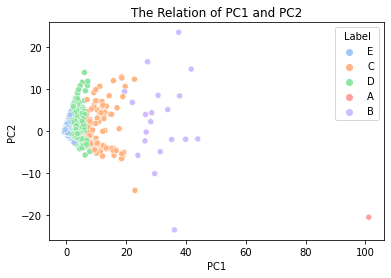

In [ ]:
sns.scatterplot('PC1', 'PC2', hue='Label', data=ext_label)
plt.title('The Relation of PC1 and PC2')
plt.show()

앞에서 'Label'은 'A' > 'B' > 'C' > 'D' > 'E' 순으로 세계적으로 더 많이 팔렸다는 것을 의미한다고 확인했다. PC1과 PC2를 scatter plot으로 나타냈을 때, PC1이 이를 잘 반영했다는 것을 시각적으로 확인할 수 있다.

## 7-2 나이브 베이즈 분류
> * 가설검증 결과 Series 게임의 데이터는 Non-Series 게임의 데이터와 구분된다고 말할 수 있다. 우리 회사에는 아직 Series로 출시한 게임이 없기 때문에 Non-Series 게임의 데이터를 기반으로 다음 분기에 설계할 게임을 선택해야 한다.
>
> * 가설검증 결과 '연도와 플랫폼', 그리고 '연도와 장르'는 연관성이 있는 것으로 밝혀졌다. 따라서 최근 플랫폼과 장르를 고려할 필요가 있다.

In [ ]:
# 가설검증 결과를 반영한 새로운 데이터프레임 new_df
df['PC1'] = ext_df['PC1']
df_nin = df[~(df['Publisher'] == 'Nintendo')]
new_df = df_nin[df_nin['Series'] == 0]
new_df = new_df[new_df['Year_bin']=="10'"]
new_df.head(3)

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Year_bin,Series,Label,PC1
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02,10',0,E,-0.631314
18,Grand Kingdom,PS4,Role-Playing,Nippon Ichi Software,0.02,0.00,0.03,0.00,0.05,10',0,E,-0.599371
27,World of Tanks,PC,Shooter,Wargaming.net,0.00,0.23,0.00,0.06,0.29,10',0,E,-0.210886


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


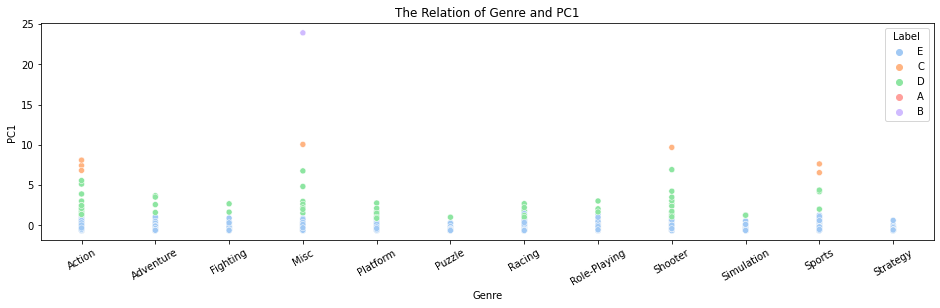

In [ ]:
plt.figure(figsize=(16, 4))
sns.scatterplot('Genre', 'PC1', hue='Label', data=new_df)
plt.xticks(rotation=30)

plt.title('The Relation of Genre and PC1')
plt.show()

> 'Action', 'Misc', 'Shooter', 'Sports' 장르가 PC1에서 우세하다.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


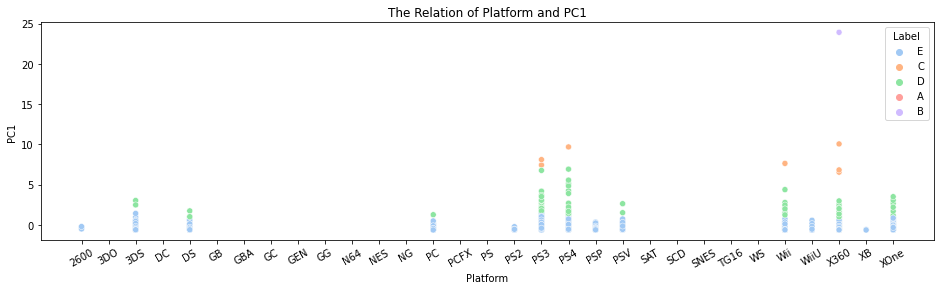

In [ ]:
plt.figure(figsize=(16, 4))
sns.scatterplot('Platform', 'PC1', hue='Label', data=new_df)
plt.xticks(rotation=30)
plt.title('The Relation of Platform and PC1')
plt.show()

> 'PS3', 'PS4', 'Wii', 'X360' 플랫폼이 PC1에서 우세하다.

나이브 베이즈 분류를 이용하여 가장 성적이 좋을 확률이 높은 조합을 골라보려 한다.

'C'를 좋은 반응, 'D'를 나쁜 반응이라고 설정한 후 다음 분류를 진행했다.

In [ ]:
pop_vc = new_df['Label'].value_counts()

p_G = {}
for G in ['Action', 'Misc', 'Shooter', 'Sports']:
  vc = new_df[new_df['Genre']==G]['Label'].value_counts()
  C = round(vc['C'] / pop_vc['C'], 3)
  D = round(vc['D'] / pop_vc['D'], 3)
  p_G[G] = [C, D]

p_P = {}
for P in ['PS3', 'PS4', 'Wii', 'X360']:
  vc = new_df[new_df['Platform']==P]['Label'].value_counts()
  C = round(vc['C'] / pop_vc['C'], 3)
  D = round(vc['D'] / pop_vc['D'], 3)
  p_P[P] = [C, D]

In [ ]:
C = round(pop_vc['C']/(pop_vc['C']+pop_vc['D']), 3)
D = round(pop_vc['D']/(pop_vc['C']+pop_vc['D']), 3)

In [ ]:
p_GP = []
for G in ['Action', 'Misc', 'Shooter', 'Sports']:
  for P in ['PS3', 'PS4', 'Wii', 'X360']:
    GP = G+'&'+P
    CC = round((C * p_G[G][0]) / ((C * p_G[G][0]) + (D * p_G[G][1])), 3)
    DD = 1-CC
    CC = round((CC * p_P[P][0]) / ((CC * p_P[P][0]) + (DD * p_P[P][1])), 3)
    p_GP.append([GP, CC])

p_GP = pd.DataFrame(p_GP, columns=['com', 'p'])
p_GP.sort_values(by='p', ascending=False).iloc[:5]

,com,p
15,Sports&X360,0.521
12,Sports&PS3,0.484
14,Sports&Wii,0.420
13,Sports&PS4,0.296
3,Action&X360,0.170


> 따라서 'Sports' 장르의 게임을 'X360' 플랫폼 형식으로 설계해야 한다.